# Histograms, Binnings, and Density

## This notebook will discuss the following:
* [Two-Dimensional Histograms and Binnings](#scrollTo=4OaCcNh2xDP_)

A simple histogram can be a great first step in understanding a dataset.
Matplotlib's histogram function creates a basic histogram in one line, once the normal boiler-plate imports are done:

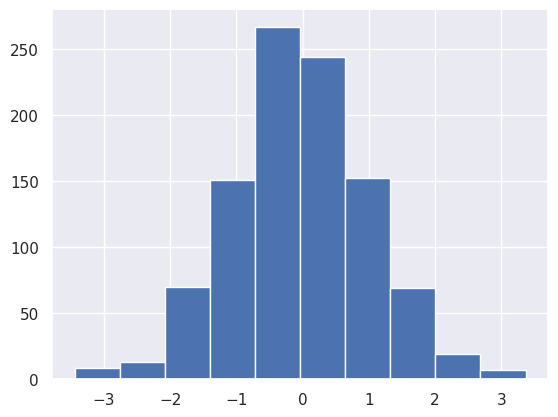

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
data = np.random.randn(1000)

plt.hist(data);

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

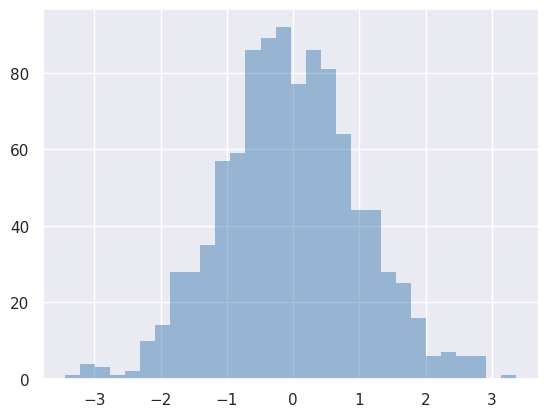

In [2]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

The ``plt.hist`` docstring has more information on other customization options available.
I find this combination of ``histtype='stepfilled'`` along with some transparency ``alpha`` to be very useful when comparing histograms of several distributions:

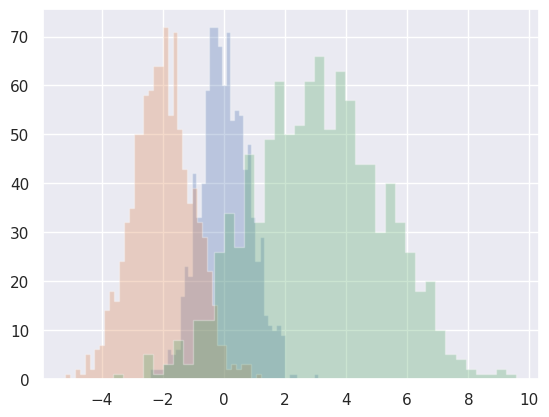

In [3]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

If you would like to simply compute the histogram (that is, count the number of points in a given bin) and not display it, the ``np.histogram()`` function is available:

In [4]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 21 221 511 221  26]


## Two-Dimensional Histograms and Binnings

Just as we create histograms in one dimension by dividing the number-line into bins, we can also create histograms in two-dimensions by dividing points among two-dimensional bins.
We'll take a brief look at several ways to do this here.
We'll start by defining some data—an ``x`` and ``y`` array drawn from a multivariate Gaussian distribution:

In [5]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: Two-dimensional histogram

One straightforward way to plot a two-dimensional histogram is to use Matplotlib's ``plt.hist2d`` function:

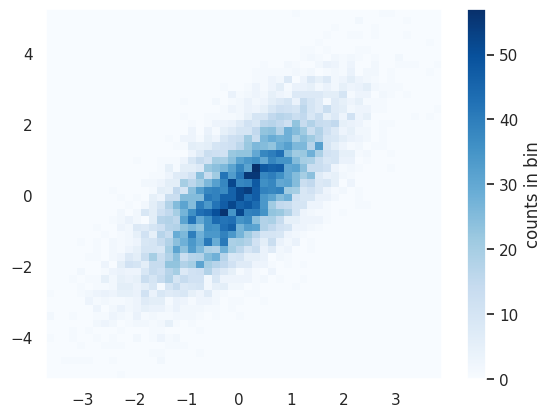

In [6]:
plt.hist2d(x, y, bins=50, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Just as with ``plt.hist``, ``plt.hist2d`` has a number of extra options to fine-tune the plot and the binning, which are nicely outlined in the function docstring.
Further, just as ``plt.hist`` has a counterpart in ``np.histogram``, ``plt.hist2d`` has a counterpart in ``np.histogram2d``, which can be used as follows:

In [7]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

For the generalization of this histogram binning in dimensions higher than two, see the ``np.histogramdd`` function.

### ``plt.hexbin``: Hexagonal binnings

The two-dimensional histogram creates a tesselation of squares across the axes.
Another natural shape for such a tesselation is the regular hexagon.
For this purpose, Matplotlib provides the ``plt.hexbin`` routine, which will represents a two-dimensional dataset binned within a grid of hexagons:

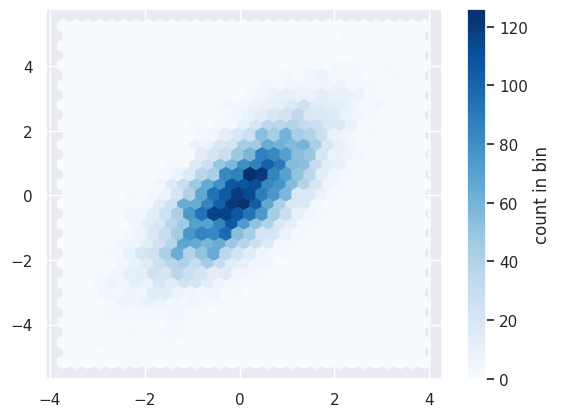

In [8]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).

#Ejercicios de Histogramas: 

1) Busque y suba un dataset para visualizar con histogramas, puede utilizar alguno de los datasets trabajados anteriormente, y visualice los 10 primeros récords del dataset (preferiblemente uno con frecuencias):

In [9]:
from google.colab import drive
import pandas as pd
drive.mount("/content/gdrive")
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/california_cities.csv')
df.head(10)

Mounted at /content/gdrive


,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
7,7,AmadorCity,38.419444,-120.824167,280.0,919.0,185,0.314,0.314,0.000,0.813,0.813,0.000,0.00
8,8,AmericanCanyon,38.168056,-122.252500,14.0,46.0,19454,4.845,4.837,0.008,12.548,12.527,0.021,0.17
9,9,Anaheim,33.836111,-117.889722,48.0,157.0,336000,50.811,49.835,0.976,131.600,129.073,2.527,1.92


2) Utilice 3 atributos para mostrar en un plot con los 3 histogramas modificando sus transparencias, asi utilizar para la comparación entre las distribuciones analizadas:

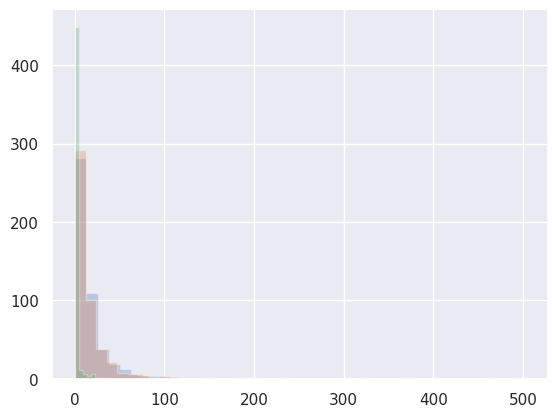

In [10]:
x1 = df['area_total_sq_mi']	
x2 = df['area_land_sq_mi']
x3 = df['area_water_sq_mi']
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);